# 模板匹配

##4.1 模板图片匹配 VS 卷积
- 作用：同尺度目标检测
- 模板：真是图片 VS 卷积核
- 操作：使用模板图片扫描整个图片 VS 卷积扫描
- 匹配结果：相似度量 VS 权重相加。模板匹配是使用一副模板图，在原图中找到相似的部分。所以肯定需要用到相似距离的计算，主要有六种：欧氏距离、标准化欧氏距离、相关、标准化相关、去均值相关，标准化去均值相关
![images](images/13.png)

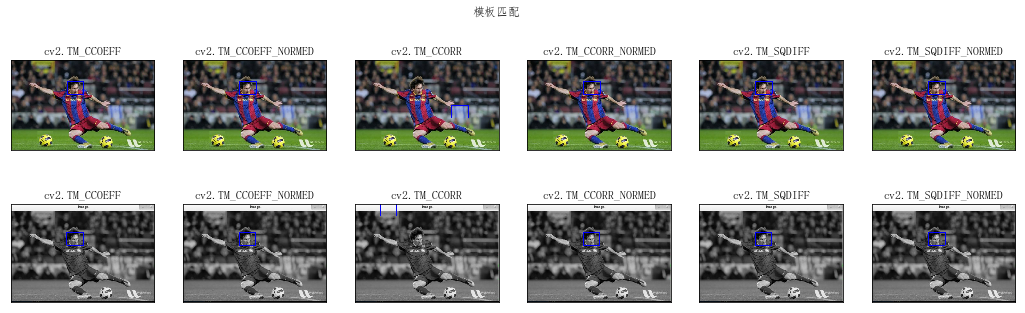

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

img = cv2.imread('images/12/messi1.jpg')
img2 = img.copy()
template = cv2.imread('images/12/template.jpg')
w, h = template.shape[:-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
plt.figure(figsize=(18,5), facecolor='w')
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
for i, meth in enumerate(methods):
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(2,6, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(meth)
    plt.xticks([]), plt.yticks([])

img = cv2.imread('images/12/messi5.jpg')
img2 = img.copy()
for i, meth in enumerate(methods):
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(2,6, i+7)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(meth)
    plt.xticks([]), plt.yticks([])

plt.suptitle(u'模板匹配')
plt.show()